In [86]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import json

# CSV de Funciones de Cineteca Nacional

Obtenida de datos.gob.mx
https://datos.gob.mx/busca/dataset/titulos-proyectado-con-asistencia

In [2]:
funciones = pd.read_csv('titulos.csv', encoding = "ISO-8859-1")

In [3]:
funciones.head()

,PELÍCULA,DIRECTOR,CICLO/ESTRENO,PAIS,ASISTENCIA,FUNCIONES,GENERO,PERIODO,MES,EXHIBIDA
0,3 mujeres o (despertando de mi sueño bosnio),Sergio Flores Thorija,Continua en Cartelera,Bosnia y Herzegovina / México,147,4.0,ADULTOS,2018,ENERO,SALA
1,Coco (doblada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,3882,15.0,NIÑOS,2018,ENERO,SALA
2,Coco (subtitulada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,2539,13.0,NIÑOS,2018,ENERO,SALA
3,"Yo, Olga. Historia de una asesina",Petr Kazda / Tomá Weinreb,Continua en Cartelera,República Checa / Polonia / Francia / Eslovaquia,2979,20.0,ADULTOS,2018,ENERO,SALA
4,Somos lengua,Kyzza Terrazas,Continua en Cartelera,México,114,4.0,ADULTOS,2018,ENERO,SALA


In [14]:
print('shape: ',funciones.shape)
for i in funciones.columns:
    null_rate = funciones[i].isna().sum() / len(funciones) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")


shape:  (2255, 12)
PELÍCULA's null rate : 0.044345898004434586%
DIRECTOR's null rate : 6.430155210643015%
CICLO/ESTRENO's null rate : 1.1529933481152994%
PAIS's null rate : 10.997782705099779%
ASISTENCIA's null rate : 12.062084257206209%
FUNCIONES's null rate : 12.195121951219512%
GENERO's null rate : 10.24390243902439%
EXHIBIDA's null rate : 0.22172949002217296%
IMDB id's null rate : 23.503325942350333%


In [5]:
funciones.dtypes

funciones['Title esp'] = funciones['PELÍCULA'].apply(lambda x: str(x).replace('(doblada)',''))
funciones['Title esp'] = funciones['Title esp'].apply(lambda x: str(x).replace('(subtitulada)',''))

#id = 'tt0816692'

In [6]:
funciones

,PELÍCULA,DIRECTOR,CICLO/ESTRENO,PAIS,ASISTENCIA,FUNCIONES,GENERO,PERIODO,MES,EXHIBIDA,Title esp
0,3 mujeres o (despertando de mi sueño bosnio),Sergio Flores Thorija,Continua en Cartelera,Bosnia y Herzegovina / México,147,4.0,ADULTOS,2018,ENERO,SALA,3 mujeres o (despertando de mi sueño bosnio)
1,Coco (doblada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,3882,15.0,NIÑOS,2018,ENERO,SALA,Coco
2,Coco (subtitulada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,2539,13.0,NIÑOS,2018,ENERO,SALA,Coco
3,"Yo, Olga. Historia de una asesina",Petr Kazda / Tomá Weinreb,Continua en Cartelera,República Checa / Polonia / Francia / Eslovaquia,2979,20.0,ADULTOS,2018,ENERO,SALA,"Yo, Olga. Historia de una asesina"
4,Somos lengua,Kyzza Terrazas,Continua en Cartelera,México,114,4.0,ADULTOS,2018,ENERO,SALA,Somos lengua
5,Batallas íntimas,Lucía Gajá,Continua en Cartelera,México,154,4.0,ADULTOS,2018,ENERO,SALA,Batallas íntimas
6,The Square: la farsa del arte,Ruben Östlund,Continua en Cartelera,Suecia-Alemania-Francia-Dinamarca,1274,9.0,ADULTOS,2018,ENERO,SALA,The Square: la farsa del arte
7,Cartas de Van Gogh,Dorota Kobiela - Hugh Welchman,Continua en Cartelera,Reino Unido,20264,70.0,ADULTOS,2018,ENERO,SALA,Cartas de Van Gogh
8,Era el Hotel Cambridge,Eliane Caffé,Continua en Cartelera,Brasil / Francia,108,4.0,ADULTOS,2018,ENERO,SALA,Era el Hotel Cambridge
9,120 latidos por minuto,Robin Campillo,Continua en Cartelera,Francia,1653,14.0,ADULTOS,2018,ENERO,SALA,120 latidos por minuto


In [7]:
#title = 'Safari'

def get_IMDb_id(title):
    import requests
    from bs4 import BeautifulSoup as bs
    
    # Getting search url:
    imdb_search = 'https://www.imdb.com/find?q={}'.format(title)
    
    # HTTP request and creating 'le soupe'
    html = requests.get(imdb_search)
    soup = bs(html.content)
    find_secs = soup.find_all('div',{"class": "findSection"})

    titles_sec = '' #empty var for now...
    print ('{}... OK'.format(title))
    #print (html)
    # Finding Title section in results and assigning it to $titles_sec
    try:
        for find_sec in find_secs:
            header = find_sec.find('h3',{"class": "findSectionHeader"}).text
            if header == 'Titles':
                titles_sec = find_sec
        #print (titles_sec)

        # Finding the link & getting id from link
        title_links = titles_sec.find_all('a')
        id = title_links[1].get('href').split('/')[2]
        #print (id)
        return id
    except:
        pass


In [8]:
funciones['IMDB id'] = funciones['Title esp'].apply(get_IMDb_id)

3 mujeres o (despertando de mi sueño bosnio)... OK
Coco ... OK
Coco ... OK
Yo, Olga. Historia de una asesina... OK
Somos lengua... OK
Batallas íntimas... OK
The Square: la farsa del arte... OK
Cartas de Van Gogh... OK
Era el Hotel Cambridge... OK
120 latidos por minuto... OK
Casa Roshell... OK
La cordillera... OK
Qué pesado este fastidio... OK
La cazadora de águilas... OK
Una bella luz interior... OK
Safari... OK


KeyboardInterrupt: 

In [110]:
d

0         None
1    tt2380307
2    tt2380307
3         None
4    tt4644536
5    tt3662334
6    tt4995790
7    tt3262342
8         None
9    tt6135348
Name: Title esp, dtype: object

In [35]:
%%time
from multiprocessing import Pool
with Pool(5) as p:
    funciones['IMDB id'] = p.map(get_IMDb_id, funciones['Title esp'])

Process ForkPoolWorker-33:
Process ForkPoolWorker-35:
Process ForkPoolWorker-34:
Process ForkPoolWorker-32:
Process ForkPoolWorker-31:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()


KeyboardInterrupt: 

In [36]:
funciones.head()

,PELÍCULA,DIRECTOR,CICLO/ESTRENO,PAIS,ASISTENCIA,FUNCIONES,GENERO,PERIODO,MES,EXHIBIDA,Title esp,IMDB id
0,3 mujeres o (despertando de mi sueño bosnio),Sergio Flores Thorija,Continua en Cartelera,Bosnia y Herzegovina / México,147,4.0,ADULTOS,2018,ENERO,SALA,3 mujeres o (despertando de mi sueño bosnio),None
1,Coco (doblada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,3882,15.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307
2,Coco (subtitulada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,2539,13.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307
3,"Yo, Olga. Historia de una asesina",Petr Kazda / Tomá Weinreb,Continua en Cartelera,República Checa / Polonia / Francia / Eslovaquia,2979,20.0,ADULTOS,2018,ENERO,SALA,"Yo, Olga. Historia de una asesina",None
4,Somos lengua,Kyzza Terrazas,Continua en Cartelera,México,114,4.0,ADULTOS,2018,ENERO,SALA,Somos lengua,tt4644536


In [54]:
funciones[(funciones['IMDB id'].isnull()==True)]['CICLO/ESTRENO'].value_counts()

Continua en Cartelera                                                       51
Muestra CUEC                                                                34
Shorts México                                                               21
CC                                                                          18
Estreno                                                                     17
                                                                            ..
Seminario experiencia de archivo                                             1
65 MUESTRA INTERNACIONAL DE CINE                                             1
Seminario de experiencia de archivo                                          1
Función vinculación                                                          1
Retrospectiva de Frederick Wiseman/Festival ambulante: Fredercik Wiseman     1
Name: CICLO/ESTRENO, Length: 139, dtype: int64

In [75]:
funciones[(funciones['IMDB id'].isnull()==False)]

,PELÍCULA,DIRECTOR,CICLO/ESTRENO,PAIS,ASISTENCIA,FUNCIONES,GENERO,PERIODO,MES,EXHIBIDA,Title esp,IMDB id,Title eng
1,Coco (doblada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,3882,15.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307,NaN
2,Coco (subtitulada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,2539,13.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307,NaN
4,Somos lengua,Kyzza Terrazas,Continua en Cartelera,México,114,4.0,ADULTOS,2018,ENERO,SALA,Somos lengua,tt4644536,NaN
5,Batallas íntimas,Lucía Gajá,Continua en Cartelera,México,154,4.0,ADULTOS,2018,ENERO,SALA,Batallas íntimas,tt3662334,NaN
6,The Square: la farsa del arte,Ruben Östlund,Continua en Cartelera,Suecia-Alemania-Francia-Dinamarca,1274,9.0,ADULTOS,2018,ENERO,SALA,The Square: la farsa del arte,tt4995790,NaN
7,Cartas de Van Gogh,Dorota Kobiela - Hugh Welchman,Continua en Cartelera,Reino Unido,20264,70.0,ADULTOS,2018,ENERO,SALA,Cartas de Van Gogh,tt3262342,NaN
9,120 latidos por minuto,Robin Campillo,Continua en Cartelera,Francia,1653,14.0,ADULTOS,2018,ENERO,SALA,120 latidos por minuto,tt6135348,NaN
10,Casa Roshell,Camila José Donoso,Continua en Cartelera,México / Chile,616,24.0,ADULTOS,2018,ENERO,SALA,Casa Roshell,tt6611238,NaN
11,La cordillera,Santiago Mitre,Continua en Cartelera,Argentina / España / Francia,244,4.0,ADULTOS,2018,ENERO,SALA,La cordillera,tt6047298,NaN
14,Una bella luz interior,Claire Denis,Continua en Cartelera,Francia,6705,54.0,ADULTOS,2018,ENERO,SALA,Una bella luz interior,tt6423776,NaN


# Prueba: Obtener titulos en ingles

Buscar titulos en ingles para Estrenos:

Buscar pelicula en google ( https://www.google.com/search?q= )
Usar Beautiful Soup para extraer DIV con data-attrid='title'

## FAILED

In [62]:
funciones[(funciones['CICLO/ESTRENO']=='Estreno')&(funciones['IMDB id'].isnull()==True)]

(17, 12)

In [70]:
def get_title_google(title_esp):
    import requests
    from bs4 import BeautifulSoup as bs
    import time
    import random
    
    # Getting search url:
    google_search = 'https://www.google.com/search?q={}'.format(title_esp)
    
    # HTTP request and creating 'le soupe'
    try:
        time.sleep(random.randrange(4))
        html = requests.get(google_search)
        soup = bs(html.content)
        find_secs = soup.find_all('div',{"data-attrid":"title"})

        titles_sec = '' #empty var for now...
        print(soup)
        print(find_secs)
        print('{}... OK'.format(title_esp))
        # print (html)
    
        
        title_eng = find_secs[0].find('span').text
        print(title_eng)
        return title_eng
    
    except:
        pass

<!DOCTYPE html>
<html lang="es-419"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>3 mujeres o (despertando de mi sueño bosnio) - Buscar con Google</title><script nonce="wIlpcoaMl3KERDG+Qb7Hhw==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Ma
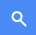
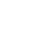
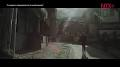

In [71]:
get_title_google('3 mujeres o (despertando de mi sueño bosnio)')


#funciones['Title eng']=funciones[(funciones['CICLO/ESTRENO']=='Estreno')&(funciones['IMDB id'].isnull()==True)].apply(get_title_google)

# Conecting to OMDb API to get Scores

In [83]:
def get_OMDb_imdb(id):
    key='a8a3d215'
    OMBb_url='http://www.omdbapi.com/?i={}&apikey={}'.format(id,key)
    
    # Connecting to OMDb API
    try:
        resp=requests.get(OMBb_url)
        results=resp.json()
        score_meta=results["Metascore"]
        score_imdb=results["imdbRating"]
        print(id,' _score: ',score_imdb)
        return score_imdb
    
    except:
        pass

In [84]:
get_OMDb_imdb('tt2380307')

tt2380307  _score:  8.4


'8.4'

In [85]:
%%time
from multiprocessing import Pool
with Pool(5) as p:
    funciones['IMDB Score'] = p.map(get_OMDb_imdb, funciones['IMDB id'])

tt5116402  _score:  N/A
tt0105185  _score:  7.7
tt1918767  _score:  N/A
tt1710542  _score:  7.3
tt2380307  _score:  8.4
tt5027774  _score:  8.2
tt2380307  _score:  8.4
tt6858388  _score:  N/A
tt6153316  _score:  N/A
tt2188860  _score:  6.8
tt6793834  _score:  N/A
tt0039836  _score:  5.5
tt4644536  _score:  6.4
tt0061551  _score:  6.3
tt1671065  _score:  N/A
tt7068364  _score:  N/A
tt5018474  _score:  N/A
tt3662334  _score:  N/A
tt0056555  _score:  7.4
tt1319265  _score:  5.0
tt5917076  _score:  N/A
tt5709636  _score:  7.7
tt0042201  _score:  6.8
tt6441212  _score:  N/A
tt0158855  _score:  7.2
tt6367558  _score:  6.2
tt4995790  _score:  7.2
tt5265960  _score:  6.1
tt0985080  _score:  6.2
tt0253366  _score:  7.4
tt2172056  _score:  7.0
tt3262342  _score:  7.8
tt5726616  _score:  7.9
tt0062121  _score:  7.1
tt4425350  _score:  N/A
tt0103874  _score:  7.4
tt0058458  _score:  7.5
tt6135348  _score:  7.4
tt5103984  _score:  7.2
tt6034966  _score:  6.5
tt6611238  _score:  N/A
tt6055758  _scor

tt0031592  _score:  6.7
tt5715874  _score:  7.0
tt6716094  _score:  5.8
tt1040043  _score:  6.4
tt5776858  _score:  7.5
tt2602732  _score:  8.6
tt5642124  _score:  6.8
tt0114709  _score:  8.3
tt5149530  _score:  9.0
tt1059956  _score:  N/A
tt6684810  _score:  7.7
tt3253930  _score:  7.3
tt0120363  _score:  7.9
tt1395766  _score:  8.6
tt0038782  _score:  6.6
tt5149530  _score:  9.0
tt0266543  _score:  8.1
tt1395766  _score:  8.6
tt3422078  _score:  7.3
tt6354108  _score:  6.7
tt0317705  _score:  8.0
tt3991348  _score:  N/A
tt0017136  _score:  8.3
tt4667788  _score:  6.8
tt0382932  _score:  8.0
tt6354108  _score:  6.7
tt0910970  _score:  8.4
tt0076336  _score:  7.7
tt6791238  _score:  4.5
tt4958426  _score:  7.4
tt5247704  _score:  6.9
tt0158855  _score:  7.2
tt2336244  _score:  N/A
tt3236654  _score:  N/A
tt0021201  _score:  4.3
tt3262342  _score:  7.8
tt0084905  _score:  4.8
tt3409848  _score:  6.7
tt1049413  _score:  8.2
tt0116571  _score:  5.8
tt0200469  _score:  3.9
tt5222918  _scor

tt3409848  _score:  6.7
tt6367558  _score:  6.2
tt6213284  _score:  6.9
tt3715392  _score:  N/A
tt4673790  _score:  6.1
tt0898251  _score:  N/A
tt0081218  _score:  6.6
tt0079944  _score:  8.2
tt6235906  _score:  6.6
tt5265948  _score:  N/A
tt5104604  _score:  7.9
tt0058385  _score:  7.8
tt0034478  _score:  7.4
tt0115734  _score:  7.0
tt0225220  _score:  N/A
tt0891519  _score:  4.2
tt5072978  _score:  N/A
tt0128445  _score:  7.7
tt6447436  _score:  N/A
tt7438960  _score:  N/A
tt4701724  _score:  6.1
tt0265335  _score:  5.8
tt0265666  _score:  7.6
tt5961974  _score:  N/A
tt0111666  _score:  7.5
tt5204030  _score:  N/A
tt5540188  _score:  6.7
tt0023902  _score:  7.8
tt7225942  _score:  5.5
tt1748122  _score:  7.8
tt0083365  _score:  6.8
tt1748122  _score:  7.8
tt0077438  _score:  6.6
tt4938700  _score:  7.4
tt2278388  _score:  8.1
tt7013830  _score:  6.9
tt0313196  _score:  6.7
tt5742374  _score:  6.8
tt7115920  _score:  7.7
tt6400280  _score:  7.3
tt1282153  _score:  6.2
tt6410564  _scor

tt7305366  _score:  6.5
tt0069467  _score:  8.1
tt4828018  _score:  N/A
tt5446512  _score:  N/A
tt7064498  _score:  6.4
tt7583568  _score:  7.0
tt3072482  _score:  6.7
tt1855418  _score:  N/A
tt0314412  _score:  7.5
tt0073015  _score:  6.3
tt0084390  _score:  7.9
tt5255874  _score:  7.3
tt3037676  _score:  N/A
tt6097248  _score:  N/A
tt0062395  _score:  6.1
tt6269060  _score:  5.0
tt0091097  _score:  5.0
tt5340300  _score:  7.2
tt1508352  _score:  7.7
tt0058083  _score:  8.0
tt7565614  _score:  7.4
tt8702008  _score:  5.5
tt3691764  _score:  N/A
tt1183352  _score:  6.7
tt5707048  _score:  7.3
tt7048622  _score:  7.7
tt7216256  _score:  6.2
tt6217664  _score:  7.8
tt1700591  _score:  N/A
tt6293042  _score:  6.2
tt5242034  _score:  N/A
tt5215010  _score:  N/A
tt0063759  _score:  7.7
tt7216256  _score:  6.2
tt7464250  _score:  7.2
tt8008664  _score:  6.3
tt0026029  _score:  7.7
tt7143874  _score:  4.8
tt4384500  _score:  N/A
tt7404868  _score:  5.9
tt0049470  _score:  7.5
tt6137626  _scor

tt0091097  _score:  5.0
tt6792282  _score:  7.6
tt6952960  _score:  6.7
tt4958448  _score:  7.0
tt6877886  _score:  6.8
tt1360961  _score:  6.6
tt4003440  _score:  6.8
tt0025524  _score:  7.3
tt0042004  _score:  6.2
tt5517708  _score:  6.4
tt0038109  _score:  7.6
tt6386748  _score:  7.6
tt0255473  _score:  6.9
tt0062301  _score:  6.7
tt0039694  _score:  6.5
tt8269552  _score:  7.1
tt0040746  _score:  8.0
tt5759064  _score:  7.2
tt0037017  _score:  7.7
tt7297954  _score:  6.4
tt0036342  _score:  7.9
tt0056869  _score:  7.7
tt8075192  _score:  8.0
tt5265964  _score:  6.9
tt4432006  _score:  5.9
tt0047396  _score:  8.4
tt0058329  _score:  7.2
tt0036342  _score:  7.9
tt6543652  _score:  7.6
tt6543652  _score:  7.6
tt0066897  _score:  5.5
tt0061107  _score:  6.7
tt0035279  _score:  7.2
tt0100935  _score:  7.2
tt5749596  _score:  6.3
tt6289724  _score:  8.2
tt0065112  _score:  6.3
tt1183352  _score:  6.7
tt6628102  _score:  8.1
tt6186068  _score:  5.9
tt6289724  _score:  8.2
tt1821502  _scor

In [87]:
funciones.head()

,PELÍCULA,DIRECTOR,CICLO/ESTRENO,PAIS,ASISTENCIA,FUNCIONES,GENERO,PERIODO,MES,EXHIBIDA,Title esp,IMDB id,Title eng,IMDB Score
0,3 mujeres o (despertando de mi sueño bosnio),Sergio Flores Thorija,Continua en Cartelera,Bosnia y Herzegovina / México,147,4.0,ADULTOS,2018,ENERO,SALA,3 mujeres o (despertando de mi sueño bosnio),None,NaN,None
1,Coco (doblada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,3882,15.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307,NaN,8.4
2,Coco (subtitulada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,2539,13.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307,NaN,8.4
3,"Yo, Olga. Historia de una asesina",Petr Kazda / Tomá Weinreb,Continua en Cartelera,República Checa / Polonia / Francia / Eslovaquia,2979,20.0,ADULTOS,2018,ENERO,SALA,"Yo, Olga. Historia de una asesina",None,NaN,None
4,Somos lengua,Kyzza Terrazas,Continua en Cartelera,México,114,4.0,ADULTOS,2018,ENERO,SALA,Somos lengua,tt4644536,NaN,6.4


In [90]:
funciones = funciones.drop(['Title eng'], axis=1)

In [97]:
funciones[(funciones['IMDB id'].isnull()==False)&(funciones['IMDB Score'].isna()==False)&(funciones['IMDB Score']!='N/A')]

,PELÍCULA,DIRECTOR,CICLO/ESTRENO,PAIS,ASISTENCIA,FUNCIONES,GENERO,PERIODO,MES,EXHIBIDA,Title esp,IMDB id,IMDB Score
1,Coco (doblada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,3882,15.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307,8.4
2,Coco (subtitulada),Lee Unkrich / Adrián Molina,Continua en Cartelera,EUA,2539,13.0,NIÑOS,2018,ENERO,SALA,Coco,tt2380307,8.4
4,Somos lengua,Kyzza Terrazas,Continua en Cartelera,México,114,4.0,ADULTOS,2018,ENERO,SALA,Somos lengua,tt4644536,6.4
6,The Square: la farsa del arte,Ruben Östlund,Continua en Cartelera,Suecia-Alemania-Francia-Dinamarca,1274,9.0,ADULTOS,2018,ENERO,SALA,The Square: la farsa del arte,tt4995790,7.2
7,Cartas de Van Gogh,Dorota Kobiela - Hugh Welchman,Continua en Cartelera,Reino Unido,20264,70.0,ADULTOS,2018,ENERO,SALA,Cartas de Van Gogh,tt3262342,7.8
9,120 latidos por minuto,Robin Campillo,Continua en Cartelera,Francia,1653,14.0,ADULTOS,2018,ENERO,SALA,120 latidos por minuto,tt6135348,7.4
11,La cordillera,Santiago Mitre,Continua en Cartelera,Argentina / España / Francia,244,4.0,ADULTOS,2018,ENERO,SALA,La cordillera,tt6047298,6.0
14,Una bella luz interior,Claire Denis,Continua en Cartelera,Francia,6705,54.0,ADULTOS,2018,ENERO,SALA,Una bella luz interior,tt6423776,6.0
15,Safari,Ulrich Seidl,Continua en Cartelera,Austria,351,19.0,ADULTOS,2018,ENERO,SALA,Safari,tt1620449,4.9
16,Elevador,Adrián Ortíz,Continua en Cartelera,México,442,22.0,ADULTOS,2018,ENERO,SALA,Elevador,tt1728975,5.3
